In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

#simulating a 10-layer network
num_layers=10
initial_gradient=0.25

gradient=initial_gradient
for layer in range(num_layers):
    gradient*=sigmoid_derivative(0)
    
#Assuming inputs are around 0 for simplicity
print(f'gradient at layer {layer+1}:{gradient}')

gradient at layer 10:2.384185791015625e-07


In [3]:
def sigmoid(x):
    """Sigmoid activation function."""
    return 1/(1+np.exp(-x))

def relu(x):
    """ReLU activation function."""
    return np.maximum(0,x)

def leaky_relu(x,alpha=0.01):
    """Leaky Relu activation function"""
    return np.maximum(alpha*x,x)

def tanh(x):
    """Tanh activation function"""
    return np.tanh(x)

def softmax(x):
    """Softmax activation function"""
    exp_x=np.exp(x-np.max(x,axis=-1, keepdims=True))
    return exp_x/np.sum(exp_x,axis=-1,keepdims=True)


In [4]:
#sample input data
x=np.array([-1,0,1,2])

#apply sigmoid activation
sigmoid_output=sigmoid(x)
print(sigmoid_output)

#apply ReLU activation
relu_output=relu(x)
print(relu_output)

#and so on for other activation functions

[0.26894142 0.5        0.73105858 0.88079708]
[0 0 1 2]


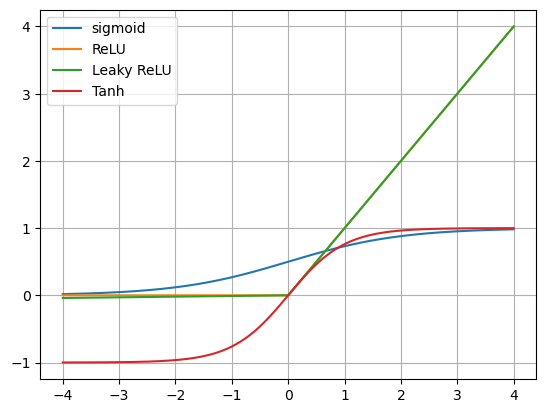

In [5]:
import matplotlib.pyplot as plt

x=np.linspace(-4,4,300)
plt.plot(x,sigmoid(x),label='sigmoid')
plt.plot(x,relu(x),label='ReLU')
plt.plot(x,leaky_relu(x),label='Leaky ReLU')
plt.plot(x,tanh(x),label='Tanh')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
def forward_propagation(X, W1, W2, b1, b2):
    # Calculate hidden layer activations
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    
    # Calculate output layer activations
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    
    return A2

# Usage:
A2, _ = forward_propagation(X, W1, W2, b1, b2)


NameError: name 'X' is not defined

In [7]:
def backward_propagation(X, Y, A2, W1, W2, b1, b2):
    # Compute the error at the output layer
    dZ2 = A2 - Y
    
    # Compute gradients for weights and biases
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0)
    
    # Backpropagate the error to the hidden layer
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    
    # Compute gradients for weights and biases
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0)
    
    return dW1, dW2, db1, db2

# Usage:
dW1, dW2, db1, db2 = backward_propagation(X, Y, A2, W1, W2, b1, b2)


NameError: name 'X' is not defined

In [8]:
# Update 1: Changes length of variable i and j as expontential activation function throws an error @input and hidden
# Update 1: Changes length of variable i = 3 and j = 14 to check which combination throws error

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from sklearn import metrics
import os
def write_to_file(data, fileName):
    file = os.path.join(r"E:\fresh", practice)
    with open(file, 'a') as f:
        f.write(str(data)+"\n")
        
d=pd.read_excel(r"E:\fresh\yearly data.xlsx",sheet_name='Sheet2')
d['x']=d['x']*1000
i = d[((d["Month"]==7))|((d["Month"]==8))].index
d1=d.drop(i)

j = d1[((d1["Year"]==2023))].index
d2=d1.drop(j)

k = d1[((d1["Year"]!=2023))].index
d3=d1.drop(k)


X_train=d2.iloc[:,[3,11,15]]
#Scaling numeric features using sklearn StandardScalar
X_train

X_test=d3.iloc[:,[3,11,15]]
X_test

Y_train=d2.iloc[:,[4]]
Y_train

Y_test=d3.iloc[:,[4]]
Y_test

act=[]
act=['relu','sigmoid','softmax','softplus','softsign','tanh','selu','elu','leaky_relu','relu6','silu','gelu','hard_sigmoid','linear','mish','log_softmax','exponential']
count=0

l=1088
#NN_model = Sequential()
filename = 'data{}.txt'.format(l)
for i in range(4,len(act)-1,1):
    for j in range(len(act)-1):
        for k in range(len(act)):
            NN_model = Sequential()
            NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation=act[i]))
            NN_model.add(Dense(256, kernel_initializer='normal',activation=act[j]))
            NN_model.add(Dense(1, kernel_initializer='normal',activation=act[k]))
            NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
            model_history=NN_model.fit(X_train, Y_train, batch_size = 10, epochs = 100,verbose=0)
            pred=NN_model.predict(X_test)
            p=pd.DataFrame(pred)
    
            rms=(np.sqrt(metrics.mean_squared_error(Y_test, p)))
            mae=metrics.mean_absolute_error(Y_test, p)
            mse=metrics.mean_squared_error(Y_test, p)
            c=act[i]
            c1=act[j]
            c2=act[k]
            c3=rms
            c4=mae
            c5=mse
            output = [c,c1,c2,c3,c4,c5]
            write_to_file(output, filename)
            l=l+1

            if l != 0 and l % 272 == 0:
                filename = 'data{}.txt'.format(l)

IndexError: positional indexers are out-of-bounds

In [9]:
# pooling
import numpy as np

In [10]:
a=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [94]:
a[0][:2]
c=[]
for i in a:
    c.append(a[0][:2])
    


In [3]:
t=[]
f=[:2]
s=[2:3]
for i in range(4):
    if 0<i
    r=max(a[i][:2])
    t.append(r)
    i=i+2
print(t)
print(max(t))

SyntaxError: invalid syntax (1176409831.py, line 2)

In [96]:
def anju_special_pooling(a):
    pool_size = 2
    t = []

    for i in range(0, a.shape[0], pool_size):
        for j in range(0, a.shape[1], pool_size):
            pool = a[i:i+pool_size, j:j+pool_size]
            r = np.max(pool)
            t.append(r)
    p=np.array(t)
    y=p.reshape(2,2)
    return y
anju_special_pooling(a)

array([[5, 6],
       [8, 9]])

In [97]:
def anju_special_striding(a,s):
    u=a[::s+1,::s+1]
    print(u)

anju_special_striding(a,2)

[[1]]


In [98]:
s=np.array([[1,2],[4,5]])

In [99]:
def anjus_special_padding(a):
    rows, cols = a.shape
    padded=(rows+2,cols+2)
    zero=np.zeros(padded)
    print(zero)
    print(np.add(a,zero))
    
    
anjus_special_padding(a)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


ValueError: operands could not be broadcast together with shapes (3,3) (5,5) 

In [100]:
a.shape[0]+1

4